In [3]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [4]:
# Project 1: General Exploratory Data Analysis (EDA)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Step 1: Load Dataset from D Drive
df = pd.read_csv("C:\\Users\\vinay\\Downloads\\Global Superstore.csv")

In [9]:
# Step 2: Data Cleaning
# Drop Postal Code due to many missing values
df.drop(columns=['Postal Code'], inplace=True)

In [10]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [11]:
# Convert Date columns to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%m/%d/%Y')

In [12]:
# Handle Outliers using IQR
Q1 = df[['Sales', 'Profit', 'Discount']].quantile(0.25)
Q3 = df[['Sales', 'Profit', 'Discount']].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[~((df[['Sales', 'Profit', 'Discount']] < lower_bound) | (df[['Sales', 'Profit', 'Discount']] > upper_bound)).any(axis=1)]

In [13]:
# Step 3: Exploratory Data Analysis (EDA)
summary_stats = df[['Sales', 'Profit', 'Discount', 'Quantity', 'Shipping Cost']].describe()
print(summary_stats)

              Sales        Profit      Discount      Quantity  Shipping Cost
count  37504.000000  37504.000000  37504.000000  37504.000000   37504.000000
mean     103.325553     14.906986      0.091466      3.206351      11.207243
std      109.267849     24.190470      0.147780      2.058513      15.588202
min        0.990000    -55.125000      0.000000      1.000000       0.002000
25%       27.630000      2.040000      0.000000      2.000000       2.290000
50%       61.118000      9.058800      0.000000      3.000000       5.730000
75%      139.590000     24.840000      0.200000      4.000000      13.650000
max      581.250000     91.995400      0.500000     14.000000     246.050000


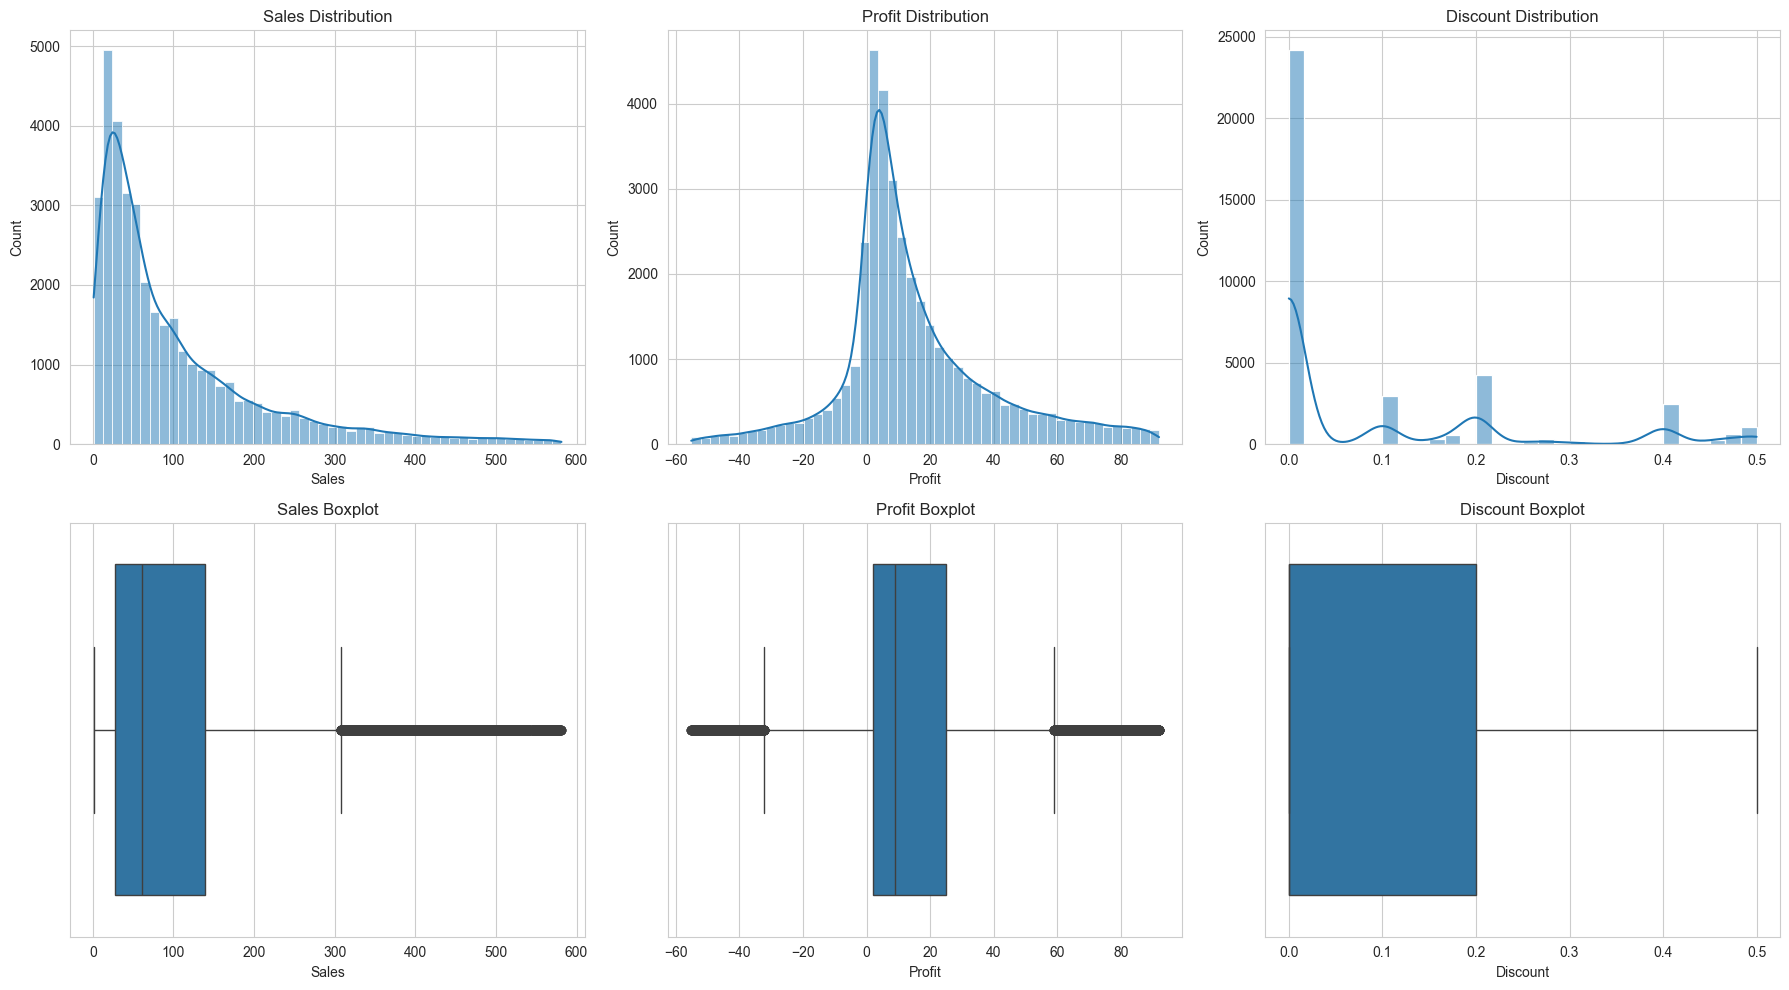

In [14]:
# Visualizations
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.histplot(df['Sales'], bins=50, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Sales Distribution")

sns.histplot(df['Profit'], bins=50, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Profit Distribution")

sns.histplot(df['Discount'], bins=30, kde=True, ax=axes[0, 2])
axes[0, 2].set_title("Discount Distribution")

sns.boxplot(x=df['Sales'], ax=axes[1, 0])
axes[1, 0].set_title("Sales Boxplot")

sns.boxplot(x=df['Profit'], ax=axes[1, 1])
axes[1, 1].set_title("Profit Boxplot")

sns.boxplot(x=df['Discount'], ax=axes[1, 2])
axes[1, 2].set_title("Discount Boxplot")

plt.tight_layout()
plt.show()

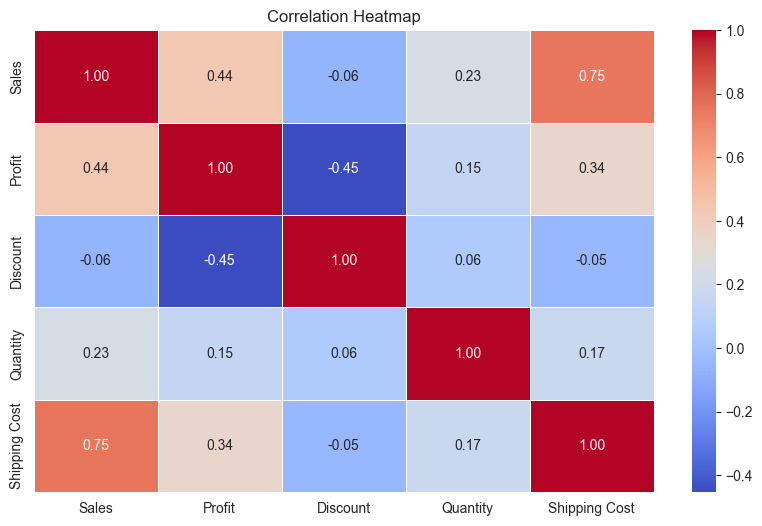

In [15]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
corr_matrix = df[['Sales', 'Profit', 'Discount', 'Quantity', 'Shipping Cost']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [21]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [22]:
# Project 2: Sales Performance Analysis & Predictive Modeling

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

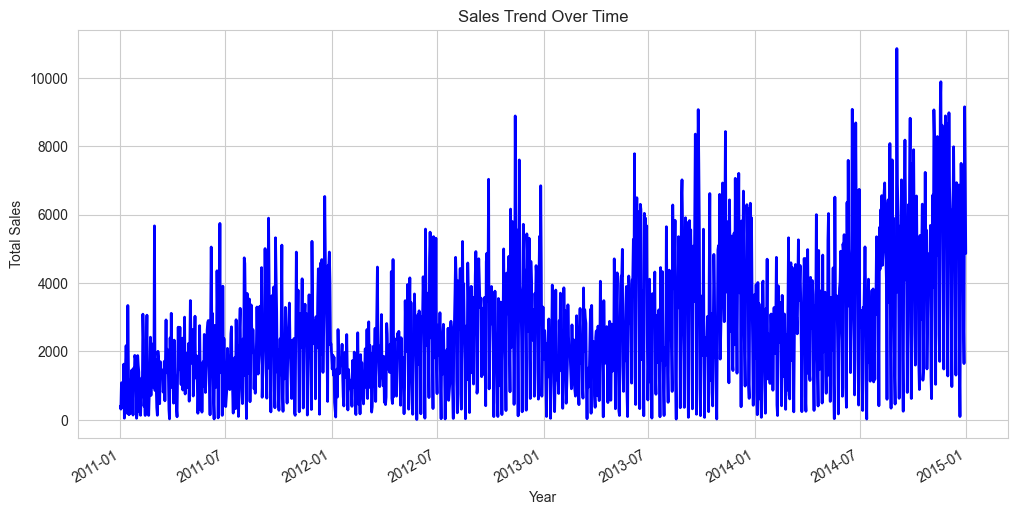

In [23]:
# Step 4: Sales Performance Analysis
# Sales Trend
sales_trend = df.groupby('Order Date')['Sales'].sum()
plt.figure(figsize=(12, 6))
sales_trend.plot(color='blue', linewidth=2)
plt.title("Sales Trend Over Time")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

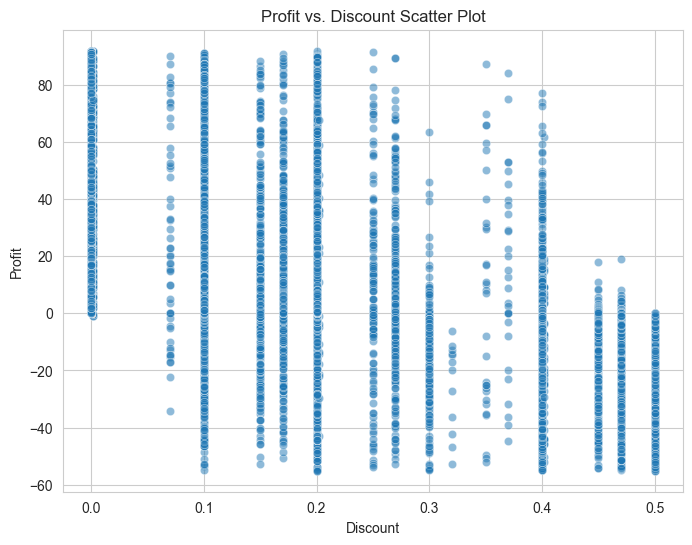

In [24]:
# Profit vs Discount Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Discount'], y=df['Profit'], alpha=0.5)
plt.title("Profit vs. Discount Scatter Plot")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.grid(True)
plt.show()

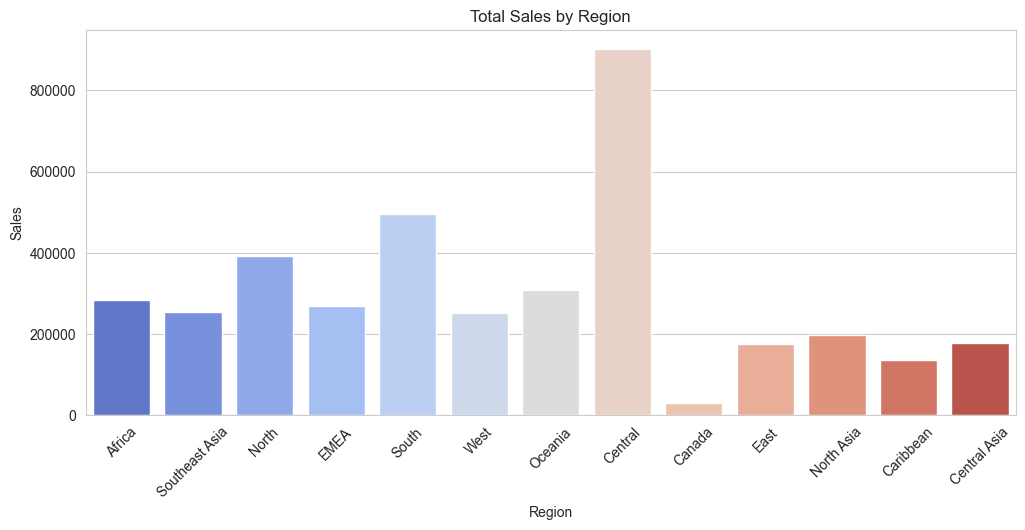

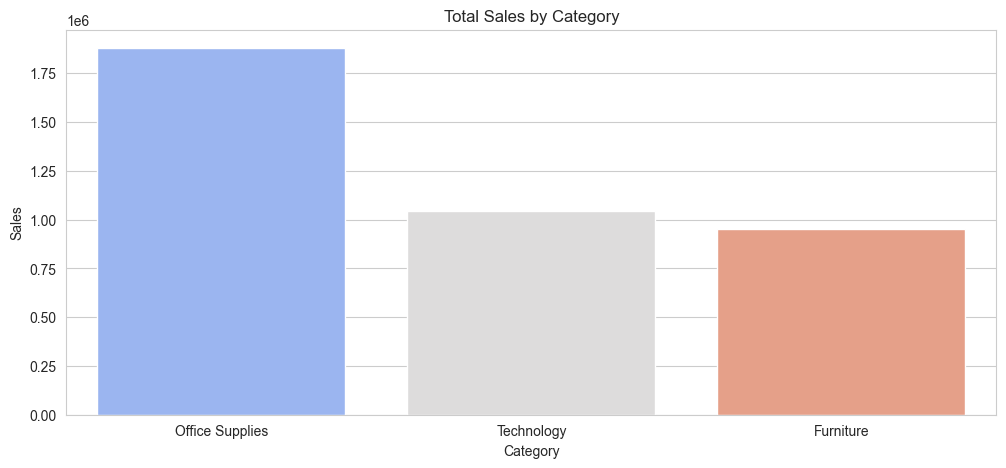

In [27]:

# Sales by Region
plt.figure(figsize=(12, 5))
sns.barplot(x=df['Region'], y=df['Sales'], estimator=sum, errorbar=None, hue=df['Region'], palette="coolwarm", legend=False)
plt.title("Total Sales by Region")
plt.xticks(rotation=45)
plt.show()

# Sales by Category
plt.figure(figsize=(12, 5))
sns.barplot(x=df['Category'], y=df['Sales'], estimator=sum, errorbar=None, hue=df['Category'], palette="coolwarm", legend=False)
plt.title("Total Sales by Category")
plt.show()


In [28]:
# Step 5: Predictive Modeling
X = df[['Profit', 'Discount']]
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [29]:
# Model Evaluation
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R² Score: {r2}")
print(f"Mean Squared Error: {mse}")

R² Score: 0.20481636140316317
Mean Squared Error: 9598.00615644682
